In [1]:
from ssd import SSD

In [2]:
import torch

In [3]:
voc_classes = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train',
    'tvmonitor'
]

ssd_cfg = {
    'classes_num': 21,
    'input_size': 300,
    'dbox_num': [4, 6, 6, 6, 4, 4],
    'feature_maps': [38, 19, 10, 5, 3, 1],
    'steps': [8, 16, 32, 64, 100, 300],
    'min_sizes': [30, 60, 111, 162, 213, 264],
    'max_sizes': [60, 111, 162, 213, 264, 315],
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

net = SSD(phase='test', cfg=ssd_cfg)

net_weights = torch.load('/home/komuro/Documents/ssdbook/weights/ssd_weights50.pth',
                         map_location={'cuda:0':'cpu'})

net.load_state_dict(net_weights)
print('SSDモデルの準備完了')

SSDモデルの準備完了


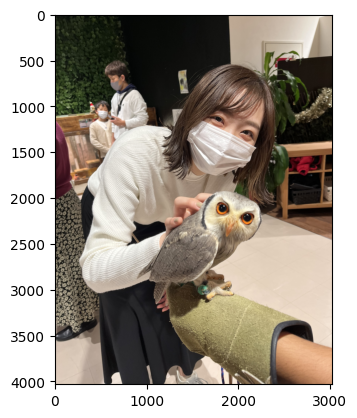

torch.Size([1, 21, 200, 5])
tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0166,  0.2995,  0.7665,  0.9561,  0.9889],
          [ 0.0153,  0.1117,  0.4883,  0.8840,  0.9744],
          [ 0.0144,  0.1088,  0.1586,  0.1994,  0.2606],
          ...,
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0426,  0.1117,  0.4883,  0.8840,  0.9744],
          [ 0.0121,  0.0972,  0.1162,  0.9206,  0.4974],
          [ 0.0120, -0.0743,  0.3870,  0.6100,  1.1207],
          ...,
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [

/home/komuro/Documents/ssdbook/ssd.py:530: UserWarning: An output with one or more elements was resized since it had shape [5], which does not match the required output shape [1]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17.)
  torch.index_select(x1, 0, idx, out=tmp_x1) # 昇順スコアに対応するxminの並び
/home/komuro/Documents/ssdbook/ssd.py:531: UserWarning: An output with one or more elements was resized since it had shape [5], which does not match the required output shape [1]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17

In [4]:
import cv2
from voc import DataTransform
import matplotlib.pyplot as plt
%matplotlib inline

image_file_path = '/home/komuro/Documents/ssdbook/data/natsu.jpg'
img = cv2.imread(image_file_path)
height, width, channels = img.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size, color_mean)

phase = 'val'
img_transformed, boxes, labels = transform(
    img,
    phase,
    '',
    ''
)

img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

net.eval()
x = img.unsqueeze(0)
detections = net(x)

print(detections.shape)
print(detections)

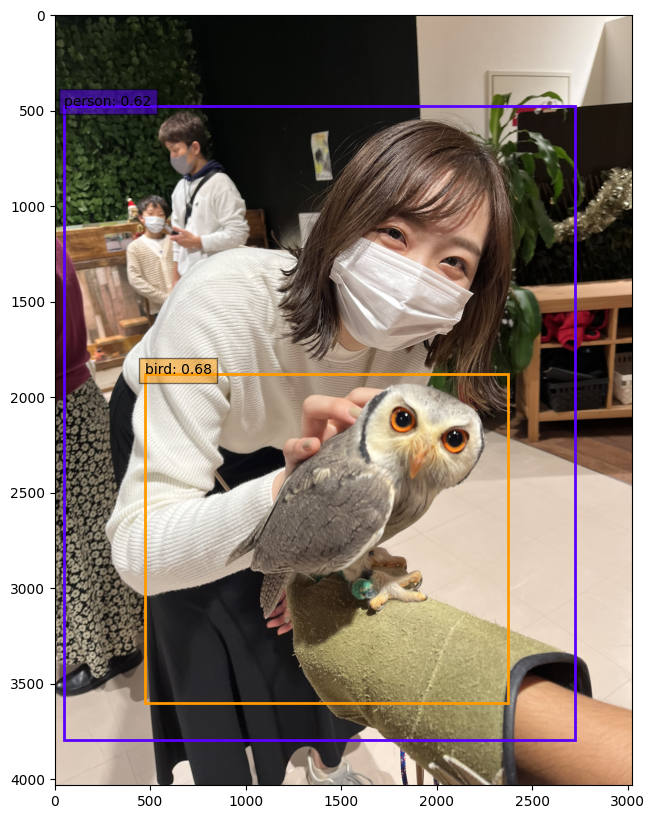

In [5]:
import sys
from ssd_predictions import SSDPredictions

image_file_path = '/home/komuro/Documents/ssdbook/data/natsu.jpg'

ssd = SSDPredictions(eval_categories=voc_classes, net=net)
ssd.show(image_file_path, confidence_threshold=0.6)

In [6]:
voc_classes = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow',
    'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train',
    'tvmonitor'
]

ssd_cfg = {
    'classes_num': 21,
    'input_size': 300,
    'dbox_num': [4, 6, 6, 6, 4, 4],
    'feature_maps': [38, 19, 10, 5, 3, 1],
    'steps': [8, 16, 32, 64, 100, 300],
    'min_sizes': [30, 60, 111, 162, 213, 264],
    'max_sizes': [60, 111, 162, 213, 264, 315],
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

net = SSD(phase='test', cfg=ssd_cfg)

net_weights = torch.load('/home/komuro/Documents/ssdbook/weights/ssd300_mAP_77.43_v2.pth',
                         map_location={'cuda:0':'cpu'})

net.load_state_dict(net_weights)
print('SSDモデルの準備完了')

SSDモデルの準備完了


/home/komuro/Documents/ssdbook/ssd.py:530: UserWarning: An output with one or more elements was resized since it had shape [50], which does not match the required output shape [13]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17.)
  torch.index_select(x1, 0, idx, out=tmp_x1) # 昇順スコアに対応するxminの並び
/home/komuro/Documents/ssdbook/ssd.py:531: UserWarning: An output with one or more elements was resized since it had shape [50], which does not match the required output shape [13]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cp

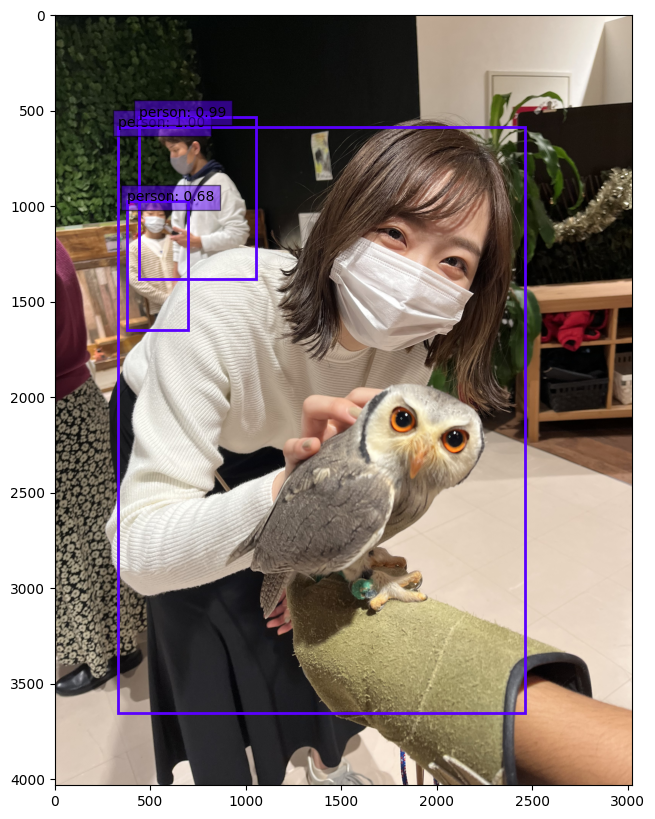

In [7]:
import sys
from ssd_predictions import SSDPredictions

image_file_path = '/home/komuro/Documents/ssdbook/data/natsu.jpg'

ssd = SSDPredictions(eval_categories=voc_classes, net=net)
ssd.show(image_file_path, confidence_threshold=0.6)